In [1]:
!python3 --version

Python 3.11.13


In [2]:
!pip uninstall -y numpy pandas pycaret

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2


In [3]:
!pip install numpy==1.24.4 pandas==2.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 127.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 103.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
plotnine 0.14.6 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
pymc 5.23.0 req

In [1]:
import numpy, pandas, sklearn
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("sklearn:", sklearn.__version__)


numpy: 1.24.4
pandas: 2.0.3
sklearn: 1.6.1


In [2]:
!pip install pycaret==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 7.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import setup


## Upload Files

In [3]:
from google.colab import files
uploaded = files.upload()  # choose "WA_Fn-UseC_-Telco-Customer-Churn.csv"


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [7]:
!ls /content/

data  logs.log	sample_data  WA_Fn-UseC_-Telco-Customer-Churn.csv


## Load the data and perform quick cleaning

In [9]:
import pandas as pd
import numpy as np

# Use the file from Kaggle or your uploaded file name
csv_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df_raw = pd.read_csv(csv_path)

# Basic shape and peek
print(df_raw.shape)
df_raw.head(3)


(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [10]:
# Strip spaces from column names (safer)
df = df_raw.copy()
df.columns = [c.strip() for c in df.columns]

# Target is 'Churn' (Yes/No). Telco id column is not predictive.
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True, errors='ignore')

# Coerce 'TotalCharges' to numeric; blank strings -> NaN
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Basic missing value report
na_counts = df.isna().sum().sort_values(ascending=False)
na_counts[na_counts > 0]


,0
TotalCharges,11


In [11]:
# Simple imputation for TotalCharges (median) if needed
if 'TotalCharges' in df.columns and df['TotalCharges'].isna().any():
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Check target distribution
df['Churn'].value_counts(normalize=True)


,proportion
Churn,
No,0.73463
Yes,0.26537


## PyCaret Classification — setup (with GPU + imbalance handling)

In [12]:
from pycaret.classification import *

exp = setup(
    data=df,
    target='Churn',
    train_size=0.8,              # 80/20 split
    session_id=42,               # reproducibility
    use_gpu=True,                # let supported learners use GPU
    fold=5,                      # CV folds
    fix_imbalance=True,          # SMOTE-like strategies if class skew exists
    remove_outliers=False,       # churn has legit tails; keep by default
    normalize=True,              # helpful for some models
    categorical_imputation='mode',
    numeric_imputation='median',
    # you can add high_cardinality_features=[], ignore_features=[], etc. if needed
)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 20)"
5,Transformed data shape,"(9687, 41)"
6,Transformed train set shape,"(8278, 41)"
7,Transformed test set shape,"(1409, 41)"
8,Numeric features,4
9,Categorical features,15


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

## Compare a broad set of models (AutoML)

In [13]:
best = compare_models(sort='AUC')  # AUC is a solid metric for churn
best


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7982,0.8459,0.7982,0.7961,0.7970,0.4765,0.4768,2.3800
lr,Logistic Regression,0.7510,0.8451,0.7510,0.8073,0.7640,0.4559,0.4802,1.5840
ada,Ada Boost Classifier,0.7927,0.8448,0.7927,0.7993,0.7954,0.4832,0.4842,0.8240
lda,Linear Discriminant Analysis,0.7442,0.8427,0.7442,0.8040,0.7578,0.4448,0.4703,0.4480
lightgbm,Light Gradient Boosting Machine,0.7916,0.8342,0.7916,0.7841,0.7866,0.4419,0.4441,2.0580
nb,Naive Bayes,0.7015,0.8198,0.7015,0.7979,0.7188,0.3911,0.4340,0.3320
xgboost,Extreme Gradient Boosting,0.7758,0.8194,0.7758,0.7678,0.7708,0.4009,0.4026,0.9300
et,Extra Trees Classifier,0.7707,0.7932,0.7707,0.7621,0.7653,0.3864,0.3882,1.2400
knn,K Neighbors Classifier,0.7002,0.7623,0.7002,0.7636,0.7162,0.3504,0.3713,0.8200
qda,Quadratic Discriminant Analysis,0.7260,0.6625,0.7260,0.6939,0.6812,0.1536,0.1790,0.4060


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

[2025-11-05 05:18:26.299] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
leaderboard = pull()
leaderboard.head(10)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7982,0.8459,0.7982,0.7961,0.7970,0.4765,0.4768,2.380
lr,Logistic Regression,0.7510,0.8451,0.7510,0.8073,0.7640,0.4559,0.4802,1.584
ada,Ada Boost Classifier,0.7927,0.8448,0.7927,0.7993,0.7954,0.4832,0.4842,0.824
lda,Linear Discriminant Analysis,0.7442,0.8427,0.7442,0.8040,0.7578,0.4448,0.4703,0.448
lightgbm,Light Gradient Boosting Machine,0.7916,0.8342,0.7916,0.7841,0.7866,0.4419,0.4441,2.058
nb,Naive Bayes,0.7015,0.8198,0.7015,0.7979,0.7188,0.3911,0.4340,0.332
xgboost,Extreme Gradient Boosting,0.7758,0.8194,0.7758,0.7678,0.7708,0.4009,0.4026,0.930
et,Extra Trees Classifier,0.7707,0.7932,0.7707,0.7621,0.7653,0.3864,0.3882,1.240
knn,K Neighbors Classifier,0.7002,0.7623,0.7002,0.7636,0.7162,0.3504,0.3713,0.820
qda,Quadratic Discriminant Analysis,0.7260,0.6625,0.7260,0.6939,0.6812,0.1536,0.1790,0.406


## Train a few strong candidates + tune

In [16]:
# Tune GBC and ADA as they are the top 3

# Step 1: Create the model
gbc = create_model('gbc')     # Gradient Boosting
ada = create_model('ada')     # AdaBoost

# Step 2: Tune the trained model objects
gbc_tuned = tune_model(gbc, optimize='AUC', choose_better=True)
ada_tuned = tune_model(ada, optimize='AUC', choose_better=True)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8163,0.8609,0.8163,0.8123,0.8139,0.5170,0.5177
1,0.8039,0.8575,0.8039,0.8002,0.8018,0.4866,0.4870
2,0.8004,0.8489,0.8004,0.7977,0.7989,0.4807,0.4809
3,0.7879,0.8369,0.7879,0.7886,0.7883,0.4577,0.4578
4,0.7824,0.8251,0.7824,0.7817,0.7821,0.4404,0.4404
Mean,0.7982,0.8459,0.7982,0.7961,0.7970,0.4765,0.4768
Std,0.0120,0.0133,0.0120,0.0104,0.0111,0.0261,0.0264


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8039,0.8538,0.8039,0.8111,0.8069,0.5131,0.5143
1,0.8012,0.8565,0.8012,0.8039,0.8025,0.4966,0.4968
2,0.7977,0.8535,0.7977,0.8004,0.7989,0.4876,0.4878
3,0.7862,0.8368,0.7862,0.7978,0.7907,0.4766,0.4789
4,0.7744,0.8236,0.7744,0.7833,0.7781,0.4419,0.4432
Mean,0.7927,0.8448,0.7927,0.7993,0.7954,0.4832,0.4842
Std,0.0110,0.0127,0.0110,0.0092,0.0101,0.0238,0.0236


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8199,0.8615,0.8199,0.8197,0.8198,0.5375,0.5375
1,0.8066,0.8604,0.8066,0.8054,0.8059,0.5006,0.5007
2,0.8066,0.8559,0.8066,0.8050,0.8057,0.4995,0.4996
3,0.7888,0.8414,0.7888,0.7931,0.7907,0.4685,0.4689
4,0.7789,0.8250,0.7789,0.7841,0.7812,0.4455,0.4460
Mean,0.8001,0.8488,0.8001,0.8014,0.8007,0.4903,0.4905
Std,0.0145,0.0139,0.0145,0.0121,0.0134,0.0313,0.0311


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8039,0.8645,0.8039,0.8213,0.8096,0.5306,0.5360
1,0.7968,0.8567,0.7968,0.8151,0.8029,0.5146,0.5202
2,0.7986,0.8570,0.7986,0.8097,0.8028,0.5070,0.5095
3,0.7755,0.8350,0.7755,0.7962,0.7825,0.4658,0.4714
4,0.7487,0.8223,0.7487,0.7713,0.7567,0.4034,0.4086
Mean,0.7847,0.8471,0.7847,0.8027,0.7909,0.4843,0.4891
Std,0.0204,0.0158,0.0204,0.0178,0.0194,0.0457,0.0456


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


## Blend the models to improve AUC

In [18]:
lr = create_model('lr')


blended = blend_models([gbc_tuned, ada_tuned, lr], optimize='AUC', choose_better=True)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7728,0.8636,0.7728,0.8261,0.7846,0.5015,0.5270
1,0.7595,0.8517,0.7595,0.8122,0.7719,0.4708,0.4940
2,0.7666,0.8526,0.7666,0.8163,0.7784,0.4836,0.5057
3,0.7329,0.8354,0.7329,0.7941,0.7472,0.4207,0.4455
4,0.7229,0.8224,0.7229,0.7878,0.7380,0.4031,0.4287
Mean,0.7510,0.8451,0.7510,0.8073,0.7640,0.4559,0.4802
Std,0.0195,0.0145,0.0195,0.0142,0.0182,0.0377,0.0371


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7995,0.8656,0.7995,0.8174,0.8054,0.5204,0.5259
1,0.7941,0.8595,0.7941,0.8155,0.8009,0.5126,0.5196
2,0.7906,0.8574,0.7906,0.8089,0.7968,0.4992,0.5045
3,0.7782,0.8415,0.7782,0.8037,0.7862,0.4799,0.4881
4,0.7540,0.8269,0.7540,0.7870,0.7640,0.4329,0.4433
Mean,0.7833,0.8501,0.7833,0.8065,0.7907,0.4890,0.4963
Std,0.0162,0.0141,0.0162,0.0109,0.0148,0.0312,0.0296


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Evaluate and finalize the model

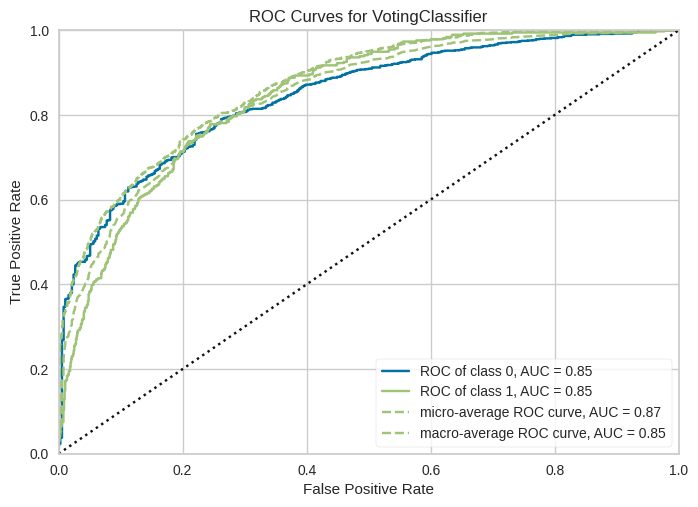

In [22]:
plot_model(blended, plot='auc')
final_candidate = blended



## Model interpretation & diagnostics

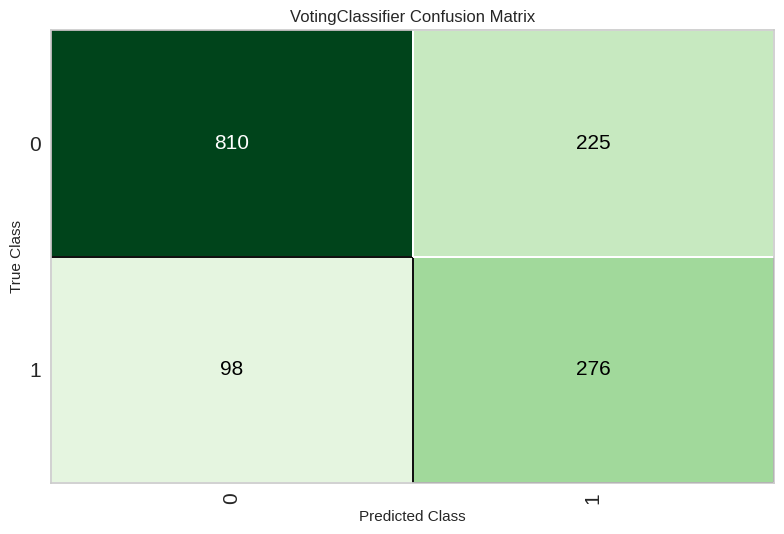

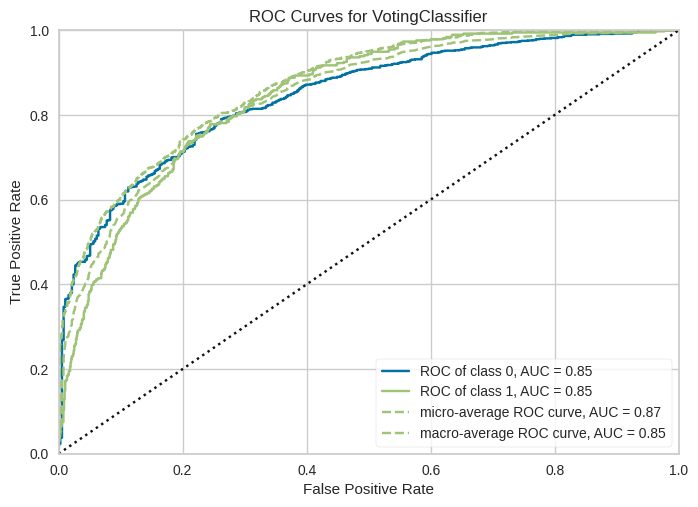

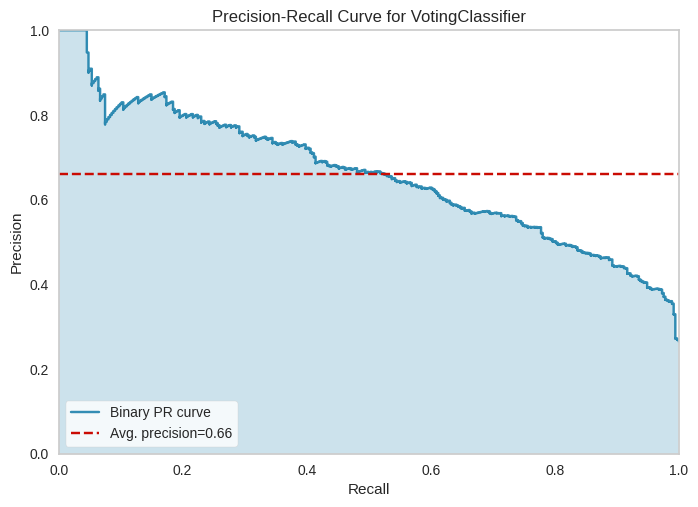

In [23]:
# Confusion matrix on validation folds
plot_model(final_candidate, plot='confusion_matrix')

# ROC curve
plot_model(final_candidate, plot='auc')

# Precision-Recall curve (useful for imbalanced churn)
plot_model(final_candidate, plot='pr')


## Evaluate on the hold-out set & finalize

1. predict_model (pre-finalize) uses cross-validation
2. finalize_model retrains on 100% of the training data and locks preprocessing.

In [24]:
# CV-level predictions/metrics
cv_predictions = predict_model(final_candidate)
cv_predictions.head()

# Train on full training data and lock the pipeline
final_model = finalize_model(final_candidate)



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7708,0.8450,0.7708,0.8015,0.7799,0.4697,0.4802


Get a true hold-out estimate; and compute a quick test AUC/PR:

In [28]:
# Create a dedicated test split for a final sanity check (optional if you trust CV)
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])
exp_holdout = setup(
    data=df_train, target='Churn', session_id=42, use_gpu=True, fold=5, fix_imbalance=True,
    normalize=True, categorical_imputation='mode', numeric_imputation='median'
)
final_on_train = finalize_model(final_candidate)

test_predictions = predict_model(final_on_train, data=df_test)
test_predictions[['Churn','prediction_label','prediction_score']].head()


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(5634, 20)"
5,Transformed data shape,"(7485, 41)"
6,Transformed train set shape,"(5794, 41)"
7,Transformed test set shape,"(1691, 41)"
8,Numeric features,4
9,Categorical features,15


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7736,0.8455,0.7736,0.8025,0.7823,0.4738,0.4835


,Churn,prediction_label,prediction_score
437,No,No,0.8358
2280,No,Yes,0.7209
2235,No,No,0.8261
4460,No,No,0.5056
3761,No,No,0.8669


In [29]:
from sklearn.metrics import roc_auc_score, average_precision_score

y_true = (test_predictions['Churn'] == 'Yes').astype(int)
y_prob = test_predictions['prediction_score']

print("Test ROC AUC:", roc_auc_score(y_true, y_prob))
print("Test Avg Precision (PR AUC):", average_precision_score(y_true, y_prob))


Test ROC AUC: 0.3368854788292129
Test Avg Precision (PR AUC): 0.19248324040602122


## Save the pipeline (for reuse + Gradio later)

In [30]:
save_path = "telco_churn_best"
save_model(final_model, save_path)


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty...
                                                                           random_state=42,
                                                                           subsample=0.6,
                             